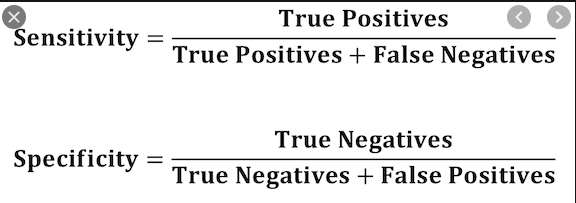

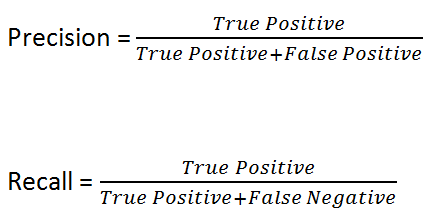

In [ ]:
import pandas as pd
df = pd.read_csv ('../input/seer-breast-cancer-dataset/SEER Breast Cancer Dataset .csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
import pandas_profiling
df.describe()
profile = ProfileReport(df)
profile.to_notebook_iframe()

In [ ]:
print(df['Status'].value_counts())

In [ ]:
from matplotlib.pyplot import suptitle
from seaborn import despine
import seaborn as sns

ax=sns.countplot(x='Status', data=df)
ax.set_xticklabels(["Alive","Dead"])
ax.set_ylabel("Count")
ax.set_xlabel("status")
suptitle("Distribution of status")


The dataset is imbalanced. 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
X = df.iloc[: , [0,1,2,4,5,6,7,8,9,10,11,12,13,14]] # Features
y = df.Status # Target variable

SEEING OUR DATASET

In [ ]:
X

In [ ]:
y

CHANGING ALL CATEGORICAL VARIABLES TO NUMERICAL BY LABLE ENCODING METHOD.

In [ ]:
y = y.astype('category')
y.dtypes
y = y.cat.codes

In [ ]:
y

In [ ]:
X.dtypes

In [ ]:
X

In [ ]:
X['Race '] = X['Race '].astype('category')
X['Race '].dtypes
X['Race '] = X['Race '].cat.codes

X['Marital Status'] = X['Marital Status'].astype('category')
X['Marital Status'].dtypes
X['Marital Status'] = X['Marital Status'].cat.codes

X['T Stage '] = X['T Stage '].astype('category')
X['T Stage '].dtypes
X['T Stage '] = X['T Stage '].cat.codes

X['N Stage'] = X['N Stage'].astype('category')
X['N Stage'].dtypes
X['N Stage'] = X['N Stage'].cat.codes

X['6th Stage'] = X['6th Stage'].astype('category')
X['6th Stage'].dtypes
X['6th Stage'] = X['6th Stage'].cat.codes

X['A Stage'] = X['A Stage'].astype('category')
X['A Stage'].dtypes
X['A Stage'] = X['A Stage'].cat.codes

X['Estrogen Status'] = X['Estrogen Status'].astype('category')
X['Estrogen Status'].dtypes
X['Estrogen Status'] = X['Estrogen Status'].cat.codes

X['Progesterone Status'] = X['Progesterone Status'].astype('category')
X['Progesterone Status'].dtypes
X['Progesterone Status'] = X['Progesterone Status'].cat.codes

X['Grade'] = X['Grade'].astype('category')
X['Grade'].dtypes
X['Grade'] = X['Grade'].cat.codes

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from seaborn import despine
from matplotlib import pyplot as plt

def evaluate_model(model, X_test,y_test,y_pred):
  confusion_matrix_forest = confusion_matrix(y_test, y_pred)
  print("confusion matrix")
  print(confusion_matrix_forest)
  #plotting a confusion matrix
  labels = ['ALive', 'Dead']
  plt.figure(figsize=(7,5))
  ax= plt.subplot()
  sns.heatmap(confusion_matrix_forest,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  print("confusion matrix")
  plt.show()


  from sklearn.metrics import classification_report
  print("classification report:")
  print(classification_report(y_test, y_pred)) 

  y_pred_rfc=model.predict(X_test)
  y_score_rfc = model.predict_proba(X_test)[:,1]
  fpr, tpr,_ = roc_curve(y_test, y_score_rfc)
  roc_auc_forests = auc(fpr, tpr)
  print("area under the curve")
  print(roc_auc_forests)

    
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  roc_auc = auc(fpr,tpr)
  plt.figure(figsize=(6,6))
  # Plotting our Baseline..
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr, tpr,'g',label='AUC = %0.3f'% roc_auc)
  plt.legend(loc='lower right')
  plt.title('ROC Curve',fontsize = 15)
  plt.xlabel('False Positive Rate',fontsize = 15)
  plt.ylabel('True Positive Rate',rotation=0,labelpad=45,fontsize = 15)
  despine()


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
evaluate_model(clf,X_test,y_test,y_pred)

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
!pip install --upgrade scikit-learn==0.20.3
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn.over_sampling as os
oversample = os.SMOTE()
X1, y1 = oversample.fit_resample(X, y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
evaluate_model(clf,X_test,y_test,y_pred)

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
import imblearn.over_sampling as os
oversample = os.ADASYN()
X1, y1 = oversample.fit_resample(X, y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
evaluate_model(clf,X_test,y_test,y_pred)

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
import imblearn.over_sampling as os
oversample = os.BorderlineSMOTE()
X1, y1 = oversample.fit_resample(X, y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
evaluate_model(clf,X_test,y_test,y_pred)

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
import imblearn.over_sampling as os
oversample = os.RandomOverSampler
X1, y1 = oversample.fit_resample(os.RandomOverSampler(),X=X,y=y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
evaluate_model(clf,X_test,y_test,y_pred)

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
import imblearn.under_sampling as us
oversample = us.AllKNN()
X1, y1 = oversample.fit_resample(X, y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
evaluate_model(clf,X_test,y_test,y_pred)

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#finding best parameters by using gridsearch
models = [('knn', KNN), 
          ('logistic', LogisticRegression),
          ('tree', DecisionTreeClassifier),
          ('forest', RandomForestClassifier)
         ]

param_choices = [
    {
        'n_neighbors': range(1, 100)
    },
    {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [2,4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }
]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params)
    grid.fit(X_train, y_train)
    s = f"{name}: best score: {grid.best_score_} : best parameter : {grid.best_params_} : estimator: {grid.best_estimator_}"
    print(s)
    grids[name] = grid

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_best=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rfc_best.fit(X_train, y_train)
y_pred_rfc=rfc_best.predict(X_test)
evaluate_model(model=rfc_best, X_test = X_test , y_test = y_test, y_pred = y_pred_rfc)


In [ ]:
import imblearn.over_sampling as os
oversample = os.SMOTE()
X1, y1 = oversample.fit_resample(X, y)

from sklearn.ensemble import RandomForestClassifier
rfc_best=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
rfc_best.fit(X_train, y_train)
y_pred_rfc=rfc_best.predict(X_test)
evaluate_model(model=rfc_best, X_test = X_test , y_test = y_test, y_pred = y_pred_rfc)


oversample = os.ADASYN()
X1, y1 = oversample.fit_resample(X, y)

from sklearn.ensemble import RandomForestClassifier
rfc_best=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
rfc_best.fit(X_train, y_train)
y_pred_rfc=rfc_best.predict(X_test)
evaluate_model(model=rfc_best, X_test = X_test , y_test = y_test, y_pred = y_pred_rfc)


oversample = os.BorderlineSMOTE()
X1, y1 = oversample.fit_resample(X, y)

from sklearn.ensemble import RandomForestClassifier
rfc_best=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
rfc_best.fit(X_train, y_train)
y_pred_rfc=rfc_best.predict(X_test)
evaluate_model(model=rfc_best, X_test = X_test , y_test = y_test, y_pred = y_pred_rfc)


oversample = os.RandomOverSampler
X1, y1 = oversample.fit_resample(os.RandomOverSampler(),X=X,y=y)

from sklearn.ensemble import RandomForestClassifier
rfc_best=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
rfc_best.fit(X_train, y_train)
y_pred_rfc=rfc_best.predict(X_test)
evaluate_model(model=rfc_best, X_test = X_test , y_test = y_test, y_pred = y_pred_rfc)


import imblearn.under_sampling as us
oversample = us.AllKNN()
X1, y1 = oversample.fit_resample(X, y)

from sklearn.ensemble import RandomForestClassifier
rfc_best=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
rfc_best.fit(X_train, y_train)
y_pred_rfc=rfc_best.predict(X_test)
evaluate_model(model=rfc_best, X_test = X_test , y_test = y_test, y_pred = y_pred_rfc)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# train your model using all data and the best known parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
y_pred_knn=knn.predict(X_test)
evaluate_model(knn,X_test,y_test,y_pred_knn)

In [ ]:
import imblearn.over_sampling as os
oversample = os.SMOTE()
X1, y1 = oversample.fit_resample(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# train your model using all data and the best known parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
y_pred_knn=knn.predict(X_test)
evaluate_model(knn,X_test,y_test,y_pred_knn)


oversample = os.ADASYN()
X1, y1 = oversample.fit_resample(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# train your model using all data and the best known parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
y_pred_knn=knn.predict(X_test)
evaluate_model(knn,X_test,y_test,y_pred_knn)


oversample = os.BorderlineSMOTE()
X1, y1 = oversample.fit_resample(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# train your model using all data and the best known parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
y_pred_knn=knn.predict(X_test)
evaluate_model(knn,X_test,y_test,y_pred_knn)


oversample = os.RandomOverSampler
X1, y1 = oversample.fit_resample(os.RandomOverSampler(),X=X,y=y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# train your model using all data and the best known parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
y_pred_knn=knn.predict(X_test)
evaluate_model(knn,X_test,y_test,y_pred_knn)


import imblearn.under_sampling as us
oversample = us.AllKNN()
X1, y1 = oversample.fit_resample(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# train your model using all data and the best known parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
y_pred_knn=knn.predict(X_test)
evaluate_model(knn,X_test,y_test,y_pred_knn)




In [ ]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.1,C=10,probability=True) #Gamma is the free parameter of the Gaussian radial basis function.
model_svm2.fit(X_train, y_train)
y_pred1 = model_svm2.predict(X_test)
evaluate_model(model_svm2,X_test,y_test,y_pred1)


In [ ]:
import imblearn.over_sampling as os
oversample = os.SMOTE()
X1, y1 = oversample.fit_resample(X, y)


from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.1,C=10,probability=True) #Gamma is the free parameter of the Gaussian radial basis function.
model_svm2.fit(X_train, y_train)
y_pred1 = model_svm2.predict(X_test)
evaluate_model(model_svm2,X_test,y_test,y_pred1)


oversample = os.ADASYN()
X1, y1 = oversample.fit_resample(X, y)



from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.1,C=10,probability=True) #Gamma is the free parameter of the Gaussian radial basis function.
model_svm2.fit(X_train, y_train)
y_pred1 = model_svm2.predict(X_test)
evaluate_model(model_svm2,X_test,y_test,y_pred1)


oversample = os.BorderlineSMOTE()
X1, y1 = oversample.fit_resample(X, y)



from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.1,C=10,probability=True) #Gamma is the free parameter of the Gaussian radial basis function.
model_svm2.fit(X_train, y_train)
y_pred1 = model_svm2.predict(X_test)
evaluate_model(model_svm2,X_test,y_test,y_pred1)


oversample = os.RandomOverSampler
X1, y1 = oversample.fit_resample(os.RandomOverSampler(),X=X,y=y)



from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.1,C=10,probability=True) #Gamma is the free parameter of the Gaussian radial basis function.
model_svm2.fit(X_train, y_train)
y_pred1 = model_svm2.predict(X_test)
evaluate_model(model_svm2,X_test,y_test,y_pred1)


import imblearn.under_sampling as us
oversample = us.AllKNN()
X1, y1 = oversample.fit_resample(X, y)



from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.1,C=10,probability=True) #Gamma is the free parameter of the Gaussian radial basis function.
model_svm2.fit(X_train, y_train)
y_pred1 = model_svm2.predict(X_test)
evaluate_model(model_svm2,X_test,y_test,y_pred1)




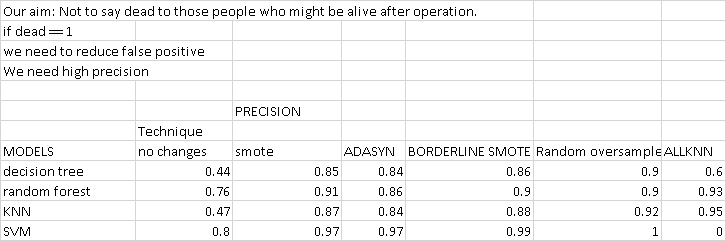

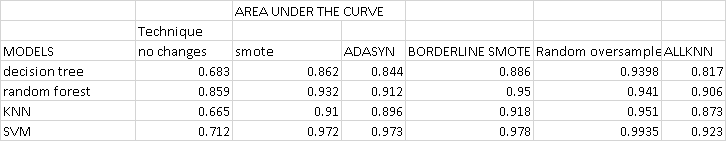

In fact, ADASYN focuses on generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier while the basic implementation of SMOTE will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule




The borderline SMOTE with the parameters- kind='borderline-1' and kind='borderline-2' — will classify each sample xi to be (i) noise (i.e. all nearest-neighbors are from a different class than the one of xi), (ii) in danger (i.e. at least half of the nearest neighbors are from the same class than xi, or (iii) safe (i.e. all nearest neighbors are from the same class than xi).




While the Random Over Sampler is over-sampling by duplicating some of the original samples of the minority class, SMOTE and ADASYN generate new samples in by interpolation.
